In [271]:
import pandas as pd
from collections import Counter
import numpy as np

In [272]:
df=pd.read_csv("Created_Personal_Loan.csv")

In [273]:
df.isnull().sum()

Age         0
Income      0
Expences    0
Gender      0
Company     0
Loan        0
dtype: int64

In [274]:
df.dtypes

Age          int64
Income       int64
Expences     int64
Gender      object
Company     object
Loan        object
dtype: object

In [275]:
df.head()


,Age,Income,Expences,Gender,Company,Loan
0,56,3029000,1847690,M,Rank 1,Accepted
1,29,796000,644760,M,Rank 2,Accepted
2,50,3011000,2167920,M,Rank 2,Accepted
3,46,2900000,2059000,M,Rank 1,Accepted
4,36,1746000,1361880,M,Rank 2,Accepted


In [276]:
df = df.sample(frac=1).reset_index(drop=True) #shuffel

In [277]:
import seaborn as sns

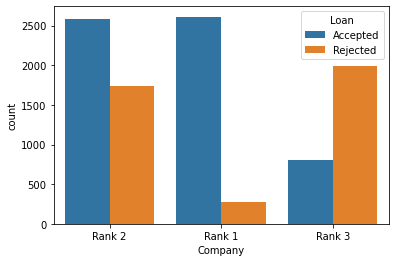

In [279]:
sns.countplot("Company",hue="Loan",data=df)

In [280]:
Counter(df["Company"])

Counter({'Rank 2': 4324, 'Rank 1': 2891, 'Rank 3': 2785})

## data processing

In [281]:
from sklearn.preprocessing import LabelEncoder

### one hot encodeing

In [282]:
dummyCompany=pd.get_dummies(df.Company)
df=pd.concat([df,dummyCompany],axis=1)
del df["Company"]
loan=df["Loan"]
del df["Loan"]
df["Loan"]=loan

In [283]:
df.head()

,Age,Income,Expences,Gender,Rank 1,Rank 2,Rank 3,Loan
0,51,3220000,2382800,M,0,1,0,Accepted
1,56,3000000,2070000,M,1,0,0,Accepted
2,37,1402000,1079540,M,0,1,0,Accepted
3,45,860000,1000180,F,1,0,0,Rejected
4,63,881000,757660,M,0,0,1,Rejected


###  label encoding

In [284]:
encode=LabelEncoder()   #female=0 male=1 
df["Gender"]=encode.fit_transform(df["Gender"])
df["Loan"]=encode.fit_transform(df["Loan"]) #accepted=0 rejected=1


In [285]:
df.head()

,Age,Income,Expences,Gender,Rank 1,Rank 2,Rank 3,Loan
0,51,3220000,2382800,1,0,1,0,0
1,56,3000000,2070000,1,1,0,0,0
2,37,1402000,1079540,1,0,1,0,0
3,45,860000,1000180,0,1,0,0,1
4,63,881000,757660,1,0,0,1,1


##  Model with company feature

In [286]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [287]:
X=df.iloc[:,:df.shape[1]-1]
y=df.Loan

In [288]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [289]:
y_test.shape

(3000,)

In [290]:
clf_model=RandomForestClassifier()

In [291]:
clf_model.fit(X_train,y_train)

RandomForestClassifier()

In [292]:
y_pred=clf_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1787    4]
 [  11 1198]]
0.995
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1791
           1       1.00      0.99      0.99      1209

    accuracy                           0.99      3000
   macro avg       1.00      0.99      0.99      3000
weighted avg       1.00      0.99      0.99      3000



In [293]:
X_train.head()

,Age,Income,Expences,Gender,Rank 1,Rank 2,Rank 3
5165,26,975000,828750,0,0,1,0
590,36,392000,344960,1,0,0,1
5721,60,1062000,864780,0,0,1,0
8829,30,1017000,833940,1,0,1,0
1044,26,422000,367140,1,0,0,1


##  model without company feature

In [294]:
X_train.head()

,Age,Income,Expences,Gender,Rank 1,Rank 2,Rank 3
5165,26,975000,828750,0,0,1,0
590,36,392000,344960,1,0,0,1
5721,60,1062000,864780,0,0,1,0
8829,30,1017000,833940,1,0,1,0
1044,26,422000,367140,1,0,0,1


In [295]:
del X_train["Rank 1"]
del X_train["Rank 2"]
del X_train["Rank 3"]
del X_test["Rank 1"]
del X_test["Rank 2"]
del X_test["Rank 3"]

In [296]:
X_train.head()

,Age,Income,Expences,Gender
5165,26,975000,828750,0
590,36,392000,344960,1
5721,60,1062000,864780,0
8829,30,1017000,833940,1
1044,26,422000,367140,1


In [297]:
clf_model2=RandomForestClassifier()

In [298]:
clf_model.fit(X_train,y_train)

RandomForestClassifier()

In [299]:
y_pred=clf_model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1788    3]
 [  18 1191]]
0.993
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1791
           1       1.00      0.99      0.99      1209

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000

